# AML-Experiment-09

20BTRCD056-SADDA SAI MOKSHITHA

Financial time series monte carlo

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# Any results you write to the current directory are saved as output.

In [2]:
data =pd.read_csv("C:/Users/prane/Downloads/all_stocks_5yr.csv")

In [3]:
data.head()

,date,open,high,low,close,volume,Name
0,2/8/2013,15.07,15.12,14.63,14.75,8407500,AAL
1,2/11/2013,14.89,15.01,14.26,14.46,8882000,AAL
2,2/12/2013,14.45,14.51,14.10,14.27,8126000,AAL
3,2/13/2013,14.30,14.94,14.25,14.66,10259500,AAL
4,2/14/2013,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
data.tail()

,date,open,high,low,close,volume,Name
619035,2/1/2018,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2/2/2018,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2/5/2018,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2/6/2018,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2/7/2018,72.70,75.00,72.69,73.86,4534912,ZTS


In [5]:
data = data[data.Name == 'AAL']

In [6]:
data.tail()

,date,open,high,low,close,volume,Name
1254,2/1/2018,54.00,54.64,53.59,53.88,3623078,AAL
1255,2/2/2018,53.49,53.99,52.03,52.10,5109361,AAL
1256,2/5/2018,51.99,52.39,49.75,49.76,6878284,AAL
1257,2/6/2018,49.32,51.50,48.79,51.18,6782480,AAL
1258,2/7/2018,50.91,51.98,50.89,51.40,4845831,AAL


Let's first use monte carlo simulation for forecasting

In [7]:
from scipy.stats import norm
log_returns = np.log(1 + data.close.pct_change())
u = log_returns.mean() #Mean of the logarithmich return
var = log_returns.var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = log_returns.std() #Standard deviation of the log return


t_intervals = 250 #I just wanted to forecast 250 time points
iterations = 10 #I wanted to have 10 different forecast

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#daily_returns actually is some kind of a noise. When we multiply this with the t time price, we can obtain t+1 time price

Let's create a variable S0 (inital stock price) equals to the last closing price 

In [8]:
S0 = data.close.iloc[-1]
S0

51.4

In [9]:
#Let us first create en empty matrix such as daily returns
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[51.4, 51.4, 51.4, ..., 51.4, 51.4, 51.4],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [10]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list = pd.DataFrame(price_list)
price_list['close'] = price_list[0]
price_list.head()

,0,1,2,3,4,5,6,7,8,9,close
0,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000
1,54.726578,51.587515,49.137068,51.451688,52.615752,51.371979,51.527719,51.004835,50.975199,50.245692,54.726578
2,54.033660,52.563816,49.774899,50.988699,52.993203,49.619751,51.376788,51.122627,51.096122,50.581059,54.033660
3,53.155422,51.269922,50.518870,52.195720,52.131423,50.052350,52.854316,51.651608,51.929025,48.904905,53.155422
4,56.104894,50.585454,49.800406,53.862774,51.394085,50.179072,50.418919,52.244172,52.027588,48.952153,56.104894


In [11]:
close = data.close
close = pd.DataFrame(close)
frames = [close, price_list]
monte_carlo_forecast = pd.concat(frames)

In [12]:
monte_carlo_forecast.head()

,close,0,1,2,3,4,5,6,7,8,9
0,14.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
monte_carlo_forecast.tail()

,close,0,1,2,3,4,5,6,7,8,9
245,44.761390,44.761390,63.959265,34.160730,80.637601,50.893711,64.477791,65.193700,51.407763,39.648354,57.218348
246,44.538655,44.538655,64.739067,34.511394,81.510883,51.106180,62.330958,66.089741,52.880342,39.292540,55.419550
247,44.486644,44.486644,62.961144,34.927089,83.764363,51.544879,63.629866,68.545048,53.117763,40.438682,57.526313
248,44.435588,44.435588,62.047966,35.216415,83.940879,52.168775,64.519674,68.219493,53.714898,41.548984,57.453284
249,44.387671,44.387671,61.827021,37.769296,84.715544,55.821128,64.129745,67.877473,55.968121,41.479101,57.973140


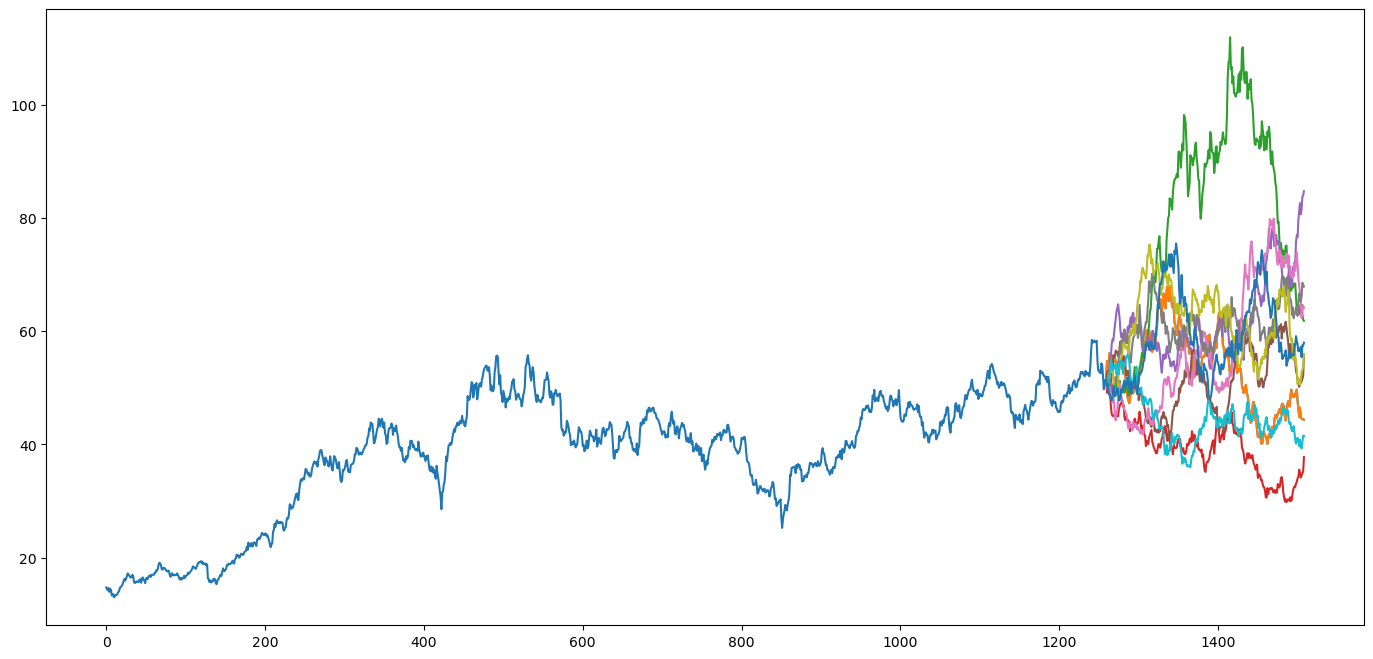

In [14]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.show()